In [1]:
import numpy as np
import sys
sys.path.append("..")
import matplotlib.pyplot as plt

import scripts.utils as utils
import src.config as config
from src.normalization_builder import NormalizationBuilder

ModuleNotFoundError: No module named 'src.utils'

#### Constants definition

In [54]:
FILE_PATH =  "../data/raw/nematode_fields/"
FIELD_ID = "field_126"
MODELS_PARAMS = {'MODELS_PATH': "../models",
                 'TEST_1REG_CP_ALPHA': 0.1,
                 'TEST_PRECLF_FILE': "pre_classifier.joblib",
                 'TEST_3REG_FILES_LOW': "pd_regressor_5.1_low.joblib",
                 'TEST_3REG_FILES_MID': "pd_regressor_5.1_mid.joblib",
                 'TEST_3REG_FILES_HIGH': "pd_regressor_5.1_high.joblib"}

#### Load NETCDF4 files for the specified FIELD_ID

In [55]:
data = utils.load_data(FILE_PATH)
selected_field = [x for x in list(data.keys()) if FIELD_ID in x]
for season in selected_field:
    print(season)

S2L2A.field_126.20170101.20171201.cldt08.cldf005.cldp01.nc
S2L2A.field_126.20180101.20181201.cldt08.cldf005.cldp01.nc
S2L2A.field_126.20190101.20191201.cldt08.cldf005.cldp01.nc
S2L2A.field_126.20200101.20201201.cldt08.cldf005.cldp01.nc
S2L2A.field_126.20210101.20211201.cldt08.cldf005.cldp01.nc
S2L2A.field_126.20220101.20221201.cldt08.cldf005.cldp01.nc
S2L2A.field_126.20230101.20231201.cldt08.cldf005.cldp01.nc


#### Compute the (lon, lat) of the specified FIELD_ID

In [56]:
(lon, lat) = (np.mean(list(data[selected_field[0]]['x'].data)), 
              np.mean(list(data[selected_field[0]]['y'].data)))
(lon, lat)

(-88.897008, 39.4926715)

#### Compute NDVI rasters and dates for all seasons

In [57]:
dates, all_rasters = [], []
for i in range(0, len(selected_field)):
    dates += utils.compute_dates(data[selected_field[i]])
    all_rasters += utils.create_rasters(data[selected_field[i]])

#### Compute NDVI time_series for all seasons

In [58]:
ndvi_time_series = [np.nanmedian(x) for x in all_rasters]
len(dates), len(ndvi_time_series)

(190, 190)

### **Normalize the seasons: this is main interface with 'Normalization Class'**

In [59]:
normalizer = NormalizationBuilder(models_config=MODELS_PARAMS)
shift_dict = normalizer.normalize_time_series(ndvi_time_series, dates, (lon, lat))

100%|███████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 1166.75it/s]


#### Show the estimated planting dates and deltas

In [60]:
#print('planting_dates:')
#print(f"{shift_dict['planting_dates']}\n------")
#print('deltas:')
#print(f"{shift_dict['deltas']}")

#### Using the normalization computed

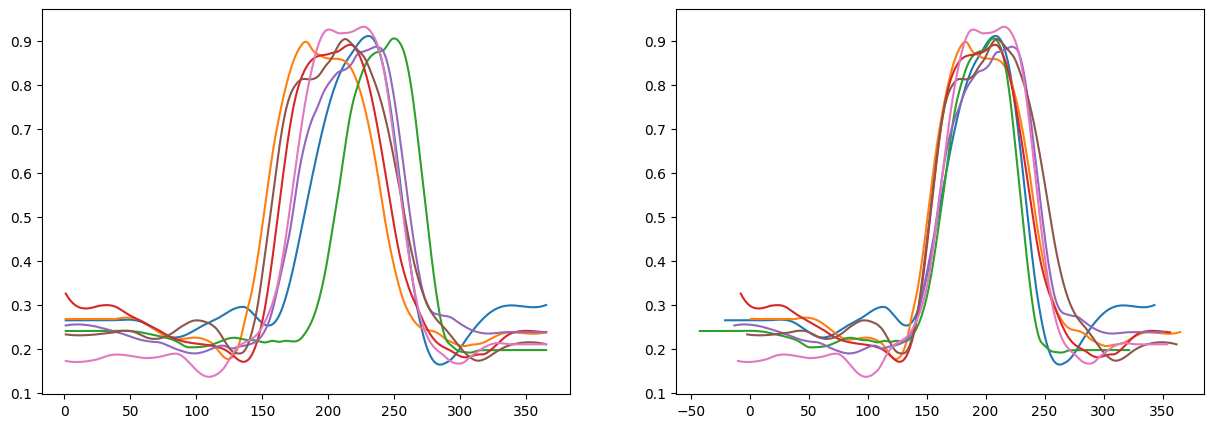

In [61]:
df = normalizer.create_planting_date_dataframe(ndvi_time_series, dates, (lon, lat))
years = ['2017', '2018', '2019', '2020', '2021', '2022', '2023']
plt.subplots(1, 2, figsize=(15, 5))
ax1 = plt.subplot(121)
for season in years:
    x = [i for i in range(1, 366)]
    y = list(df[df['cropzone'] == season]['NDVI'])
    ax1.plot(x, y)

ax2 = plt.subplot(122)
for season in years:
    x = [(i-shift_dict['deltas'][season]) for i in range(1, 366)]
    y = list(df[df['cropzone'] == season]['NDVI'])
    ax2.plot(x, y)